# ¡Hola Daniel! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


------

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Daniel excelente trabajo completando este proyecto! Has demostrado habilidades destacables en análisis exploratorio y visualización efectiva de datos. Además, tu capacidad para formular y verificar hipótesis estadísticas fue sólida y precisa, mostrando un fuerte dominio en el análisis crítico necesario para la toma de decisiones estratégicas. En general, desarrollaste un muy buen análisis en este caso de estudio, sigue manteniendo esta combinación de habilidades técnicas, analíticas y estratégicas en tus futuros proyectos.

¡Te deseo muchos éxitos en tu próximo Sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np

# Cargar el dataset desde la ruta proporcionada
df = pd.read_csv('/datasets/games.csv')

# Asegurar nombre correcto (sensible a mayúsculas)
df.rename(columns={'Year_of_Release': 'year_of_release'}, inplace=True)

# Convertir a numérico (elimina strings si hay), y luego a entero
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df = df[df['year_of_release'].notna()]  # eliminar NaN
df['year_of_release'] = df['year_of_release'].astype(int)
df['release_date'] = pd.to_datetime(df['year_of_release'], format='%Y')
# Ver información general
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             16444 non-null  object        
 1   Platform         16446 non-null  object        
 2   year_of_release  16446 non-null  int64         
 3   Genre            16444 non-null  object        
 4   NA_sales         16446 non-null  float64       
 5   EU_sales         16446 non-null  float64       
 6   JP_sales         16446 non-null  float64       
 7   Other_sales      16446 non-null  float64       
 8   Critic_Score     7983 non-null   float64       
 9   User_Score       9839 non-null   object        
 10  Rating           9768 non-null   object        
 11  release_date     16446 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 1.6+ MB
None
                       Name Platform  year_of_release         G

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo! El código realiza de forma clara la conversión de la columna year_of_release a un formato numérico y luego a entero, asegurando la limpieza de datos antes de convertirla en fechas. También es positivo que se use `errors='coerce'` y la eliminación de valores nulos.

</div>

In [2]:
# Renombrar todas las columnas a minúsculas
df.columns = df.columns.str.lower()
# Convertir tipos de datos donde sea necesario print
(df.dtypes)
# Reemplazar 'tbd' por NaN en user_score para poder convertir
df['user_score'] = df['user_score'].replace('tbd', pd.NA)

# Convertir user_score a float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Convertir year_of_release a Int64 (permite nulos)
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has aplicado correctamente el reemplazo de valores problemáticos en user_score y su conversión a tipo numérico, además de emplear el tipo Int64 para conservar los nulos en year_of_release, lo cual es un buen detalle técnico

</div>

In [3]:
# Manejo de valores ausentes 
print(df.isna().sum()) 

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
release_date          0
dtype: int64


Los valores ausentes en user_score probablemente se deben a que aún no se publicó una calificación de los usuarios.
En year_of_release, puede ser que los datos no estuvieran disponibles al momento del registro. 
Se decidió dejar en blanco los valores ausentes en lugar de imputarlos, ya que su ausencia tiene un significado propio (por ejemplo, falta de calificación o información no disponible al momento).
Reemplazar valores como 'TBD' por NaN nos permite trabajar con tipos de datos adecuados y realizar análisis más precisos.

In [4]:
# Crear una nueva columna con la suma de ventas por juego
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

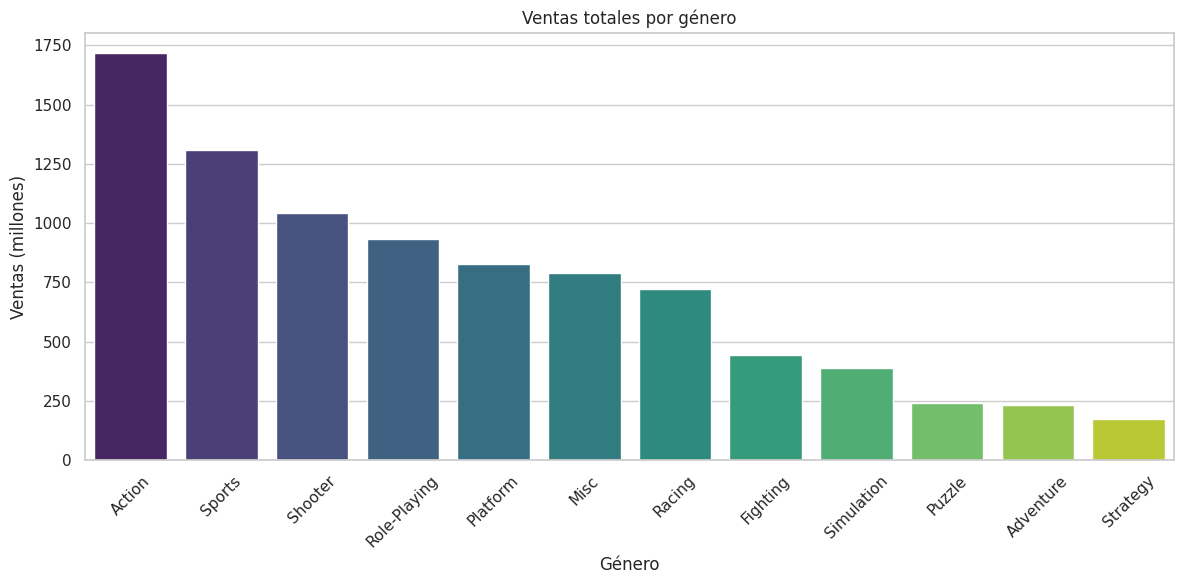

In [5]:
# Asegúrate de que las columnas están en minúsculas primero
df.columns = df.columns.str.lower()

# Crear la columna de ventas totales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

sns.set(style='whitegrid')

# Agrupar ventas por género
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')
plt.tight_layout()
plt.show()

Dejé este gráfico para que sea mejor para reconocer que género de videojuegos se vende más y ahora sigue 

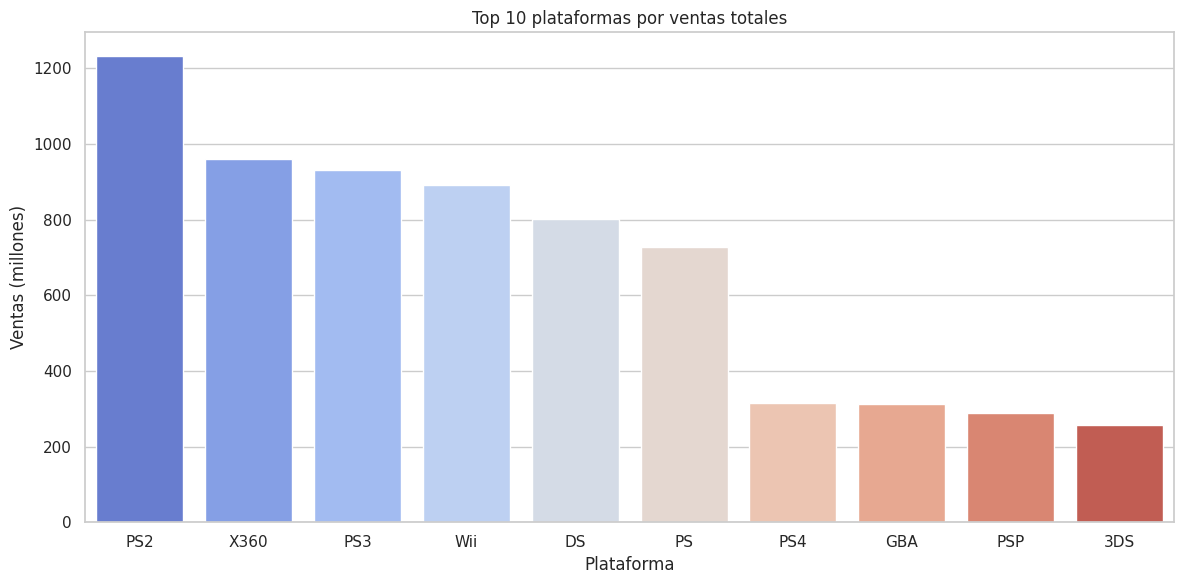

In [6]:
# Agrupar las ventas totales por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='coolwarm')
plt.title('Top 10 plataformas por ventas totales')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.tight_layout()
plt.show()

Podemos ver que la PS2 fue la consola más vendida yo como una persona que consume los videojuegos si quisiera decir porque en ese momento tenía de los mejores softwares, librería de juegos, además de que era super anunciado y pues muchisima comunidad prefiere tener un PS a un Xbox, eso ayudó mucho al total de ventas en el PS2 

In [7]:
print(df.columns)
df['na_sales'] = pd.to_numeric(df['na_sales'], errors='coerce')
df['eu_sales'] = pd.to_numeric(df['eu_sales'], errors='coerce')
df['jp_sales'] = pd.to_numeric(df['jp_sales'], errors='coerce')
df['other_sales'] = pd.to_numeric(df['other_sales'], errors='coerce')

df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
print(df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head())

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'release_date', 'total_sales'],
      dtype='object')
                       name  na_sales  eu_sales  jp_sales  other_sales  \
0                Wii Sports     41.36     28.96      3.77         8.45   
1         Super Mario Bros.     29.08      3.58      6.81         0.77   
2            Mario Kart Wii     15.68     12.76      3.79         3.29   
3         Wii Sports Resort     15.61     10.93      3.28         2.95   
4  Pokemon Red/Pokemon Blue     11.27      8.89     10.22         1.00   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  


## Analisis de datos 

In [8]:
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'release_date', 'total_sales'],
      dtype='object')


In [9]:
# Contar número de juegos por año
juegos_por_año = df['year_of_release'].value_counts().sort_index()
print(juegos_por_año)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


In [10]:
# Definir umbral mínimo 
umbral = 200
# Filtrar años con cantidad significativa de juegos
años_significativos = juegos_por_año[juegos_por_año >= umbral]
print("Años con cantidad significativa de juegos (>= {}):".format(umbral))
print(años_significativos)

Años con cantidad significativa de juegos (>= 200):
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


Dejé aquí este umbral para dejar como los años que son más importantes en la producción de videojuegos esto tomando en cuenta que en sus primeros años fueron donde pues eran juegos muy pocos producidos y que desde el año 1995 empezó como ese aumento exponencial hacia la producción ya que igual empezaron a crearse más productoras, algo que me gustaría añadir que en el año 2009 que se hicieron 1426 y a este año se le conoce el año del videojuego porque tambien fue comod idje muchas productoras y muchas consolas en el mismo momento que estaban en máxima producción y consumo

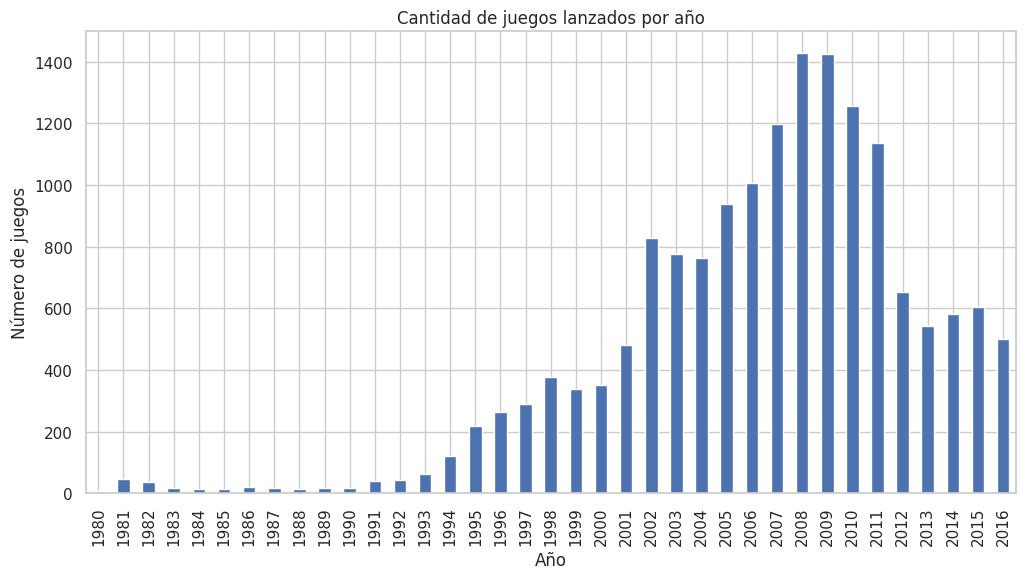

In [11]:
juegos_por_año.plot(kind='bar', figsize=(12,6))
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.show() 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu enfoque para identificar los años clave en la historia de la producción de videojuegos tiene una lógica bien fundamentada, especialmente al reconocer el cambio significativo a partir de mediados de los noventa como un punto de inflexión en la industria

</div>

In [12]:
# Calcular ventas totales por juego si no está creada aún
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Agrupar por plataforma y año, sumando las ventas
ventas_por_plataforma_anio = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

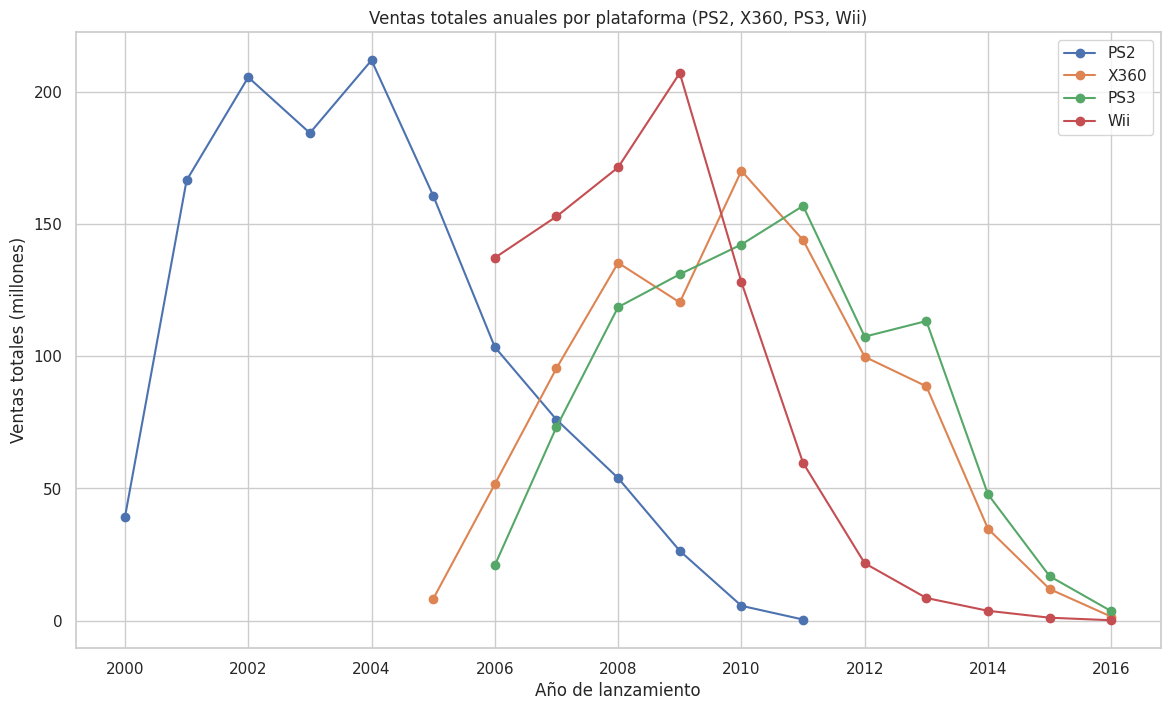

In [13]:
# Plataformas específicas
plataformas_elegidas = ['PS2', 'X360', 'PS3', 'Wii']

# Calcular ventas totales por juego si no está creada aún
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Agrupar por plataforma y año, sumando las ventas
ventas_por_plataforma_anio = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

plt.figure(figsize=(14,8))

for platform in plataformas_elegidas:
    datos = ventas_por_plataforma_anio[ventas_por_plataforma_anio['platform'] == platform]
    plt.plot(datos['year_of_release'], datos['total_sales'], marker='o', label=platform)

plt.title('Ventas totales anuales por plataforma (PS2, X360, PS3, Wii)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend()
plt.grid(True)
plt.show()

Aqui tambien tanto del año pico de ventas de cada consola que podemos ver que el PS2 tuvo dos picos de ventas muy altos casi similares en 2 años y fue el único que tuvo ese pico y en ese inicio de ventas el único que le gana y empezó brutal fue el Wiii que fue su competencia directa,tanto el xbox 360 y el PS3 empezaron super mal por sus precios de venta que si no mal recuerdo eran carisimos para el día uno. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu observación sobre los patrones de ventas por consola es acertada, especialmente al señalar cómo el PS2 logró mantener una demanda alta en distintos momentos, lo que habla de su aceptación sostenida en el mercado. 

</div>

## Modelo 2017

Para hacer este modelo sobre las 4 consolas pues principales tuvieron su pico de 2005 a 2013 y no están activas en 2017 y se debverían de usar datos de las plataformas aún eran activas y con ventas que son signficativas y usaré datos de 2010 a 2016 que serían los más cercanos y usaré el siguiente dataframe para la preducción de plataforma, genero y ventas. 

In [14]:
# Asegurar tipos
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['year_of_release'] = df['year_of_release'].dropna().astype(int)

# Filtrar años 2010 a 2016
df_train = df[df['year_of_release'].between(2010, 2016)].copy()

# Calcular total_sales si aún no lo tienes
for col in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')

df_train['total_sales'] = df_train[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [15]:
# Promedio por plataforma y género
promedios = df_train.groupby(['platform', 'genre'])['total_sales'].mean().reset_index()
promedios.columns = ['platform', 'genre', 'predicted_sales']


In [16]:
# Simular nuevos juegos en 2017
juegos_2017 = pd.DataFrame({
    'platform': ['PS4', 'XOne', '3DS', 'PC', 'WiiU'],
    'genre': ['Action', 'Shooter', 'Role-Playing', 'Strategy', 'Sports']
})

# Hacer merge con los promedios de ventas
juegos_2017_pred = juegos_2017.merge(promedios, on=['platform', 'genre'], how='left')

print(juegos_2017_pred)

  platform         genre  predicted_sales
0      PS4        Action         0.667361
1     XOne       Shooter         1.587632
2      3DS  Role-Playing         0.967816
3       PC      Strategy         0.280323
4     WiiU        Sports         0.395000


Viendo esta predicción podemos ver que la plataforma que más vendería sería el Xbox One con un juego Shooter con segundo lugar el Nintendo 3DS con un juego de rol y por ultimo en el top el PS4 con uno de acción, la columna de predicted_sales está son ventas estimadas en millones. Aquí dejé en especifico estas plataformas que creo yo que son lideres en ventas porque es más facil la producción de juegos para estas, para WiiU solamente los hace como producciones de la misma empresa, si no pues es dificil que dejen entrar más productoras, para PC en lo que llegan a portear los juegos para PC pues luego hacen más tardada la entrada de estos videosjuegos, yo podría en específico un PS Y un Xbox como la competencia directa entre ambas. 

In [17]:
# Calcular total_sales si no lo tienes aún
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

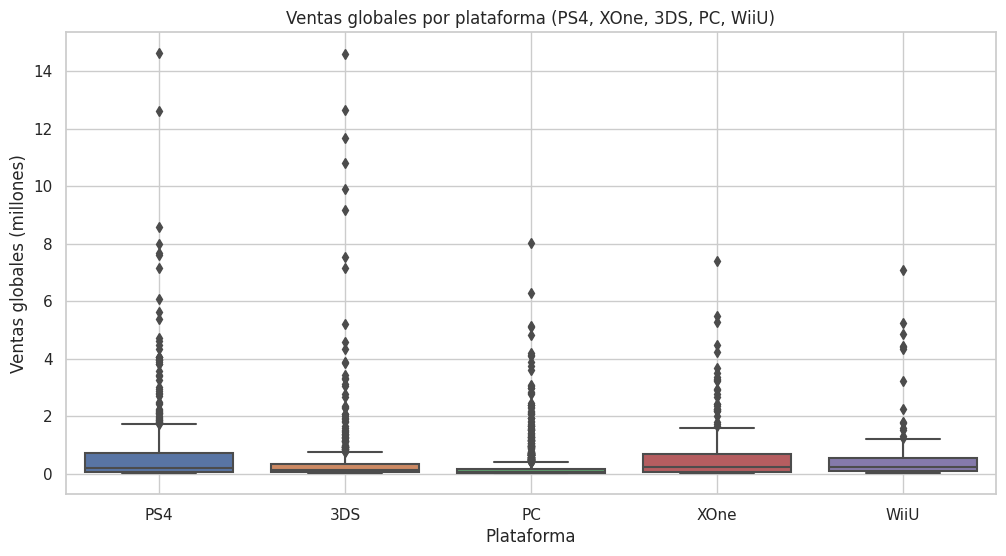

In [18]:
# Lista de plataformas a analizar
plataformas_deseadas = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']

# Filtrar solo esas plataformas
df_filtrado = df[df['platform'].isin(plataformas_deseadas)]

# Crear boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtrado, x='platform', y='total_sales')

plt.title('Ventas globales por plataforma (PS4, XOne, 3DS, PC, WiiU)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.show()

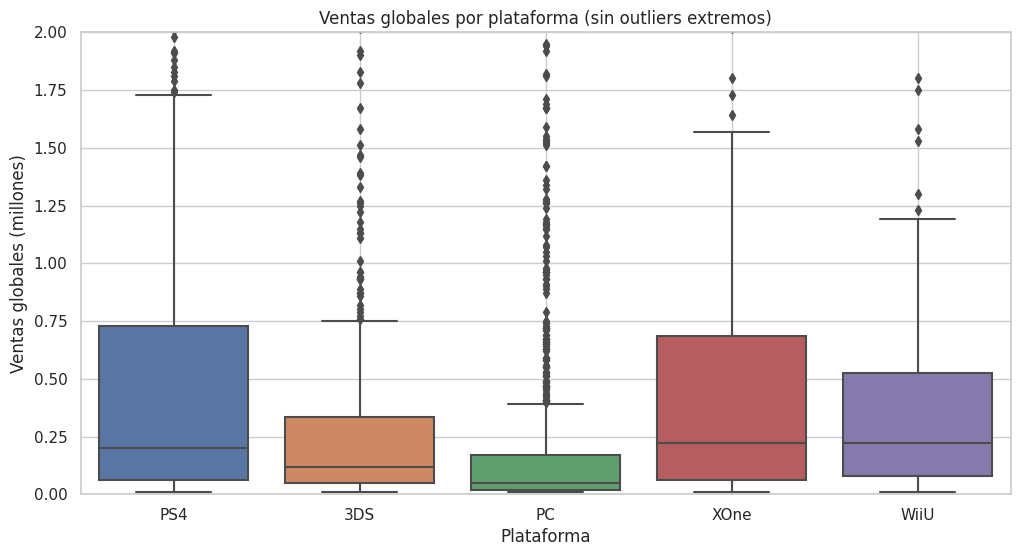

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtrado, x='platform', y='total_sales')

plt.ylim(0, 2)  # Mostrar hasta 2 millones de ventas
plt.title('Ventas globales por plataforma (sin outliers extremos)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.show()

Cada caja te da una visión rápida de cómo están distribuidas las ventas de juegos en una plataforma, la línea central (mediana): valor de ventas donde se parte la mitad de los juegos, en la caja se abarca del 1er cuartil (Q1) al 3er cuartil (Q3) → el 50% central de los juegos, los "bigotes": se extienden hasta los valores que no son considerados atípicos, los puntos fuera de los bigotes: son outliers, juegos con ventas mucho mayores o menores que el resto.
En PS4 que sería la consola que mas vendió la mediana alrededor de 0.4–0.5 millones de unidades, la caja abarca aproximadamente de 0.1 a 1 millón → la mayoría de los juegos venden en ese rango y los outliers arriba de 2 millones, indicando que hay varios éxitos grandes en sus videosjuegos como  GTA V, FIFA que en general es lo más comprado, casi el mismo caso para xbox que su mediana cercana a 0.3–0.5 millones, similar a PS4 la caja es más angosta ventas más concentradas también presenta outliers importantes, pero en menor cantidad que PS4. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Daniel buen trabajo, la forma en que interpretaste los diagramas de caja permite comprender con claridad la distribución de ventas por consola, destacando diferencias sutiles pero importantes entre plataformas. 

</div>

Reseñas de Usuarios y profesionales en la PS4 

In [20]:
# Elegimos PS4 
df_ps4 = df[df['platform'] == 'PS4'].copy()
# Limpiar user_score
df_ps4['user_score'] = pd.to_numeric(df_ps4['user_score'], errors='coerce')
df_ps4['critic_score'] = pd.to_numeric(df_ps4['critic_score'], errors='coerce')

# Eliminar filas con valores faltantes
df_ps4_clean = df_ps4.dropna(subset=['user_score', 'critic_score', 'total_sales'])

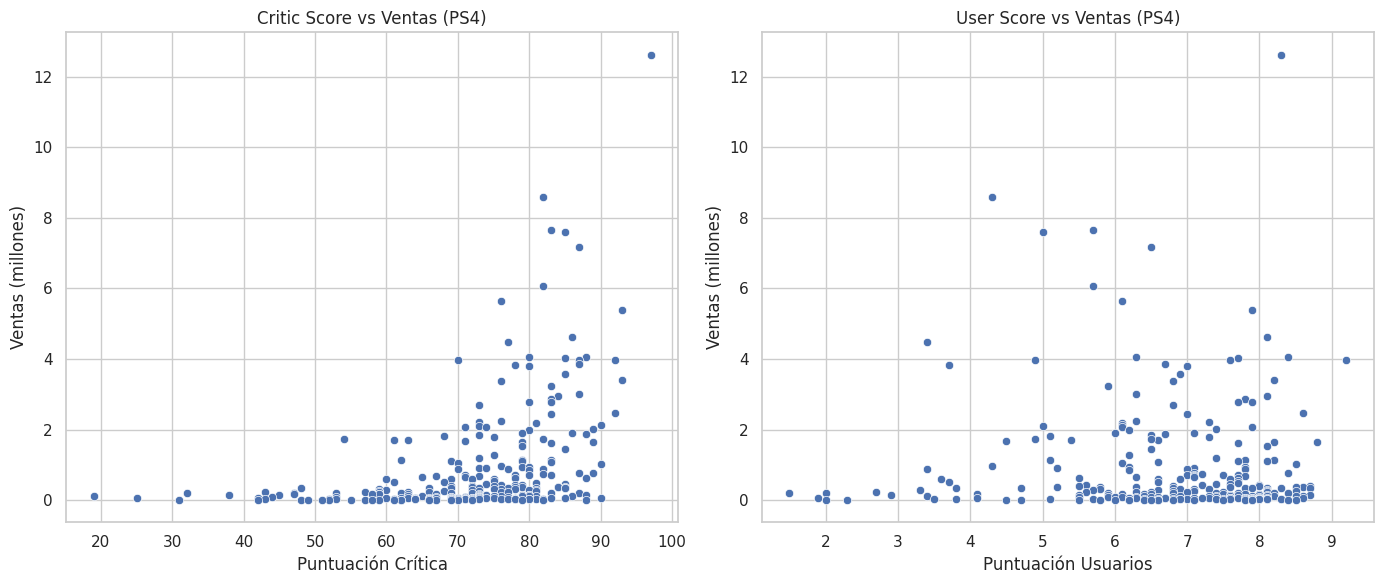

In [21]:
# Gráfico de dispersión 
plt.figure(figsize=(14, 6))

# Gráfico 1: Critic Score vs Ventas
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_ps4_clean, x='critic_score', y='total_sales')
plt.title('Critic Score vs Ventas (PS4)')
plt.xlabel('Puntuación Crítica')
plt.ylabel('Ventas (millones)')

# Gráfico 2: User Score vs Ventas
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_ps4_clean, x='user_score', y='total_sales')
plt.title('User Score vs Ventas (PS4)')
plt.xlabel('Puntuación Usuarios')
plt.ylabel('Ventas (millones)')

plt.tight_layout()
plt.show()

In [22]:
#Correlación 
cor_critic = df_ps4_clean['critic_score'].corr(df_ps4_clean['total_sales'])
cor_user = df_ps4_clean['user_score'].corr(df_ps4_clean['total_sales'])

print("Correlación entre Critic Score y Ventas:", cor_critic)
print("Correlación entre User Score y Ventas:", cor_user) 

Correlación entre Critic Score y Ventas: 0.40589480145836687
Correlación entre User Score y Ventas: -0.03362497596528878


En cuanto a critic score y ventas que es una correlación positiva moderada indica que a mayor puntuación tiene esta una mayor venta 
y en cuanto a user score y ventas no tiene que ver un juego con muy buena o muy mala nota de usuarios puede vender igual mucho o poco.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Genial, Con esta información se evidencia que la puntuación de los críticos está un poco más relacionada con las ventas que la de los usuarios, aunque la correlación es débil. En User_Score no hay una tendencia clara, pero en Critic_Score, los juegos mejor calificados tienden a vender más. Esto sugiere que las críticas especializadas pueden tener mayor impacto en las ventas.

</div>

Con un juego en común 

In [23]:
# Filtrar solo Grand Theft Auto V
gta_v = df[df['name'] == 'Grand Theft Auto V'].copy()

# Asegurar que las puntuaciones estén limpias
gta_v['user_score'] = pd.to_numeric(gta_v['user_score'], errors='coerce')
gta_v['critic_score'] = pd.to_numeric(gta_v['critic_score'], errors='coerce')

# Seleccionar columnas clave
gta_v = gta_v[['platform', 'year_of_release', 'total_sales', 'critic_score', 'user_score']]

# Ordenar por año o ventas
gta_v = gta_v.sort_values(by='total_sales', ascending=False)
print(gta_v)

     platform  year_of_release  total_sales  critic_score  user_score
16        PS3             2013        21.05          97.0         8.2
23       X360             2013        16.27          97.0         8.1
42        PS4             2014        12.62          97.0         8.3
165      XOne             2014         5.47          97.0         7.9
1730       PC             2015         1.17          96.0         7.9


Respecto a un solo juego que en este caso utilicé al GTA V que fue como el juego o de los más jugado en la decada casi casi y que todos están esperando el GTA VI por el fenomeno que es podemos ver que PlayStation siempre tiene mejores ventas en este juego tanto en la old gen como en new gen, con muchsimas más ventas que Xbox, que los usuarios dan mucho mayor compra en estas plataformas y tambien lo califican mejor los usuarios en estas consolas. 


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo analizando los juegos multiplataformas, con esta información es posible relacionar los juegos con mayor popularidad y las plataformas más comercializadas. 

</div>

# Distribución de juego por genero 

In [24]:
# Número de juegos por género
juegos_por_genero = df['genre'].value_counts()
print(juegos_por_genero)
# Ventas totales por género
ventas_por_genero = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(ventas_por_genero)

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64
genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64


In [25]:
# Promedio de ventas por juego en cada género
ventas_promedio = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
print(ventas_promedio)

genre
Platform        0.940262
Shooter         0.803519
Role-Playing    0.628683
Racing          0.590122
Sports          0.567940
Fighting        0.528865
Action          0.519057
Misc            0.459204
Simulation      0.452695
Puzzle          0.421599
Strategy        0.256419
Adventure       0.180456
Name: total_sales, dtype: float64


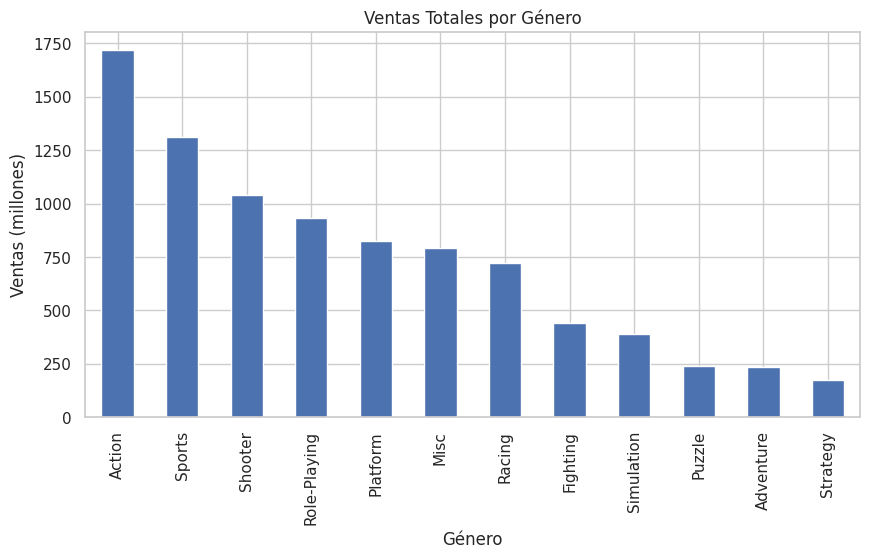

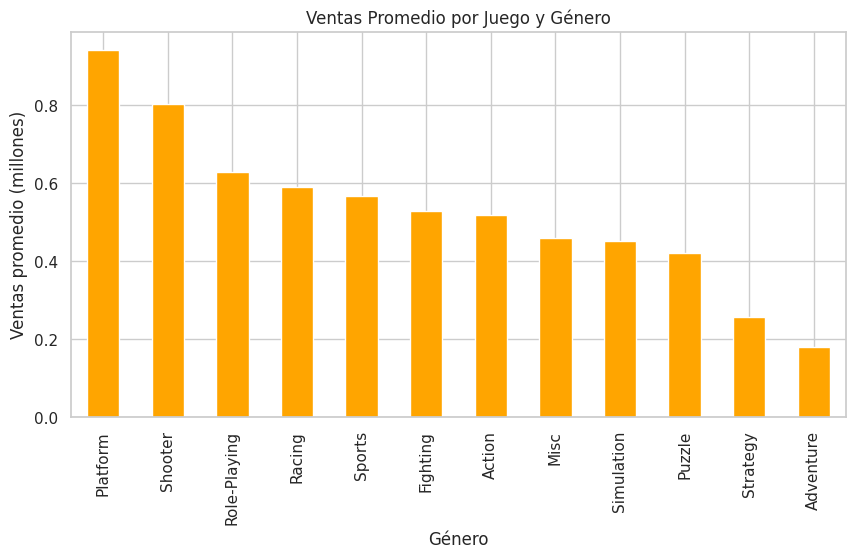

In [26]:
# Total de ventas por género
ventas_por_genero.plot(kind='bar', figsize=(10, 5), title='Ventas Totales por Género')
plt.ylabel('Ventas (millones)')
plt.xlabel('Género')
plt.grid(True)
plt.show()

# Promedio de ventas por juego
ventas_promedio.plot(kind='bar', figsize=(10, 5), title='Ventas Promedio por Juego y Género', color='orange')
plt.ylabel('Ventas promedio (millones)')
plt.xlabel('Género')
plt.grid(True)
plt.show()

Como conclusión podemos ver que los juegos de plataforma, los shooters y los juegos de Rol son los top en promedio los más vendidos pero en ventas totales todo se lo lleva los juegos de acción, seguido por los deportes y los shooters estos mismos en acción yo asocio mucho al GTA V, de deportes claramente por el FIFA o EAFC y por los juegos de rol como los Pokemon, Dark Souls, etc. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo! Se ve claramente que los juegos de acción y deportes lideran en ventas. Los géneros de rol y shooter también destacan, aunque en menor medida. En cambio, los de estrategia, aventura y puzzle muestran ventas más bajas, lo que indica una demanda más limitada.

</div>

# Paso 4

In [27]:
# Suma ventas por plataforma y región
ventas_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
ventas_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
ventas_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

# Top 5 plataformas por región
top5_na = ventas_na.head(5)
top5_eu = ventas_eu.head(5)
top5_jp = ventas_jp.head(5)

print("Top 5 plataformas en NA:\n", top5_na)
print("\nTop 5 plataformas en EU:\n", top5_eu)
print("\nTop 5 plataformas en JP:\n", top5_jp)

Top 5 plataformas en NA:
 platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

Top 5 plataformas en EU:
 platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

Top 5 plataformas en JP:
 platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


In [28]:
#Cuotas de mercado 
cuota_na = top5_na / ventas_na.sum() * 100
cuota_eu = top5_eu / ventas_eu.sum() * 100
cuota_jp = top5_jp / ventas_jp.sum() * 100
# Suma ventas por género y región
ventas_gen_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
ventas_gen_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
ventas_gen_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 géneros en NA:\n", ventas_gen_na)
print("\nTop 5 géneros en EU:\n", ventas_gen_eu)
print("\nTop 5 géneros en JP:\n", ventas_gen_jp)

Top 5 géneros en NA:
 genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64

Top 5 géneros en EU:
 genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64

Top 5 géneros en JP:
 genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


En NA y EU dominan consolas como PS4, XOne, y WiiU, mientras que en Japón la preferencia fuerte es por 3DS y PS4, mostrando diferencias culturales y de mercado; en cuanto a los géneros podemos dar aquí un gran punto porque como una inferencia que pues el mercado de Action va a estar en todos porque es como lo más común en lo consumid, en cuanto a los deportes igual es más consumido en NA Y EU yo creo que esto se debe en cuanto a que los jugadores en JP prefieren consumir juegos de Rol la popularidad de los juegos de rol en Japón se debe a una combinación de factores culturales, sociales y de diseño que han permitido crear una identidad única y resonar profundamente con la audiencia japonesa. 
A Las clasificación que se otorgan por ESRB Las ventas en NA y EU están dominadas por títulos con clasificación M (Mature) y T (Teen), mientras que en Japón hay mayor presencia de juegos sin clasificación o con clasificación diferente, reflejando normativas y cultura distinta.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Aunque los valores son correctos, recuerda que los seres humanos somos principalmente visuales. Por lo tanto, cuando manejes este tipo de información, una buena práctica es acompañarla de una gráfica. Esto facilita el estudio y el análisis de los datos.

Para lograr un análisis comparativo más efectivo, sería beneficioso presentar cada sección de información empleando un único diagrama de barras. Al asignar un color distintivo a cada región, podremos crear una representación visual unificada que facilite la identificación de patrones y diferencias entre las distintas áreas. Esta consolidación de datos no solo optimizará el espacio visual, sino que también permitirá al lector establecer conexiones y comparaciones de manera más intuitiva y directa entre los distintos conjuntos de información. Acá te muestro un ejemplo 

<img src="https://www.analyticslane.com/storage/2022/06/matplotlib-barras-adyacentes.png.webp" width="400">

</div>

# Paso 5

## Pruebas de hipótesis

In [34]:
#H0: lAS CALIFACIONES PROMEDIO DE LOS USUARIOS PARA LAS PLATAFORMAS DE XBOX ONE Y PC SON LAS MISMAS 
#M1: LAS CALIFACIONES PROMEDIO DE LOS USUARIOS PARA LAS PLATAFORMAS DE XBOX ONE Y PC SON DIFERENTES 
# Convertir User_Score a numérico (por si acaso)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Filtrar calificaciones de usuarios para cada plataforma (sin NaN)
user_xone = df[df['platform'] == 'XOne']['user_score'].dropna()
user_pc = df[df['platform'] == 'PC']['user_score'].dropna()
# α = 0.05
# Tamaño de muestra
print(f'Tamaño muestra XOne: {len(user_xone)}')
print(f'Tamaño muestra PC: {len(user_pc)}')

# Prueba t para muestras independientes
resultado = ttest_ind(user_xone, user_pc, equal_var=False)

print(f'Estadístico t: {resultado.statistic:.4f}')
print(f'Valor p: {resultado.pvalue:.4f}')

Tamaño muestra XOne: 182
Tamaño muestra PC: 755
Estadístico t: -4.6711
Valor p: 0.0000


El valor p es mucho menor que 0.05, por lo que rechazamos la hipótesis nula H0 que decía que las calificaciones promedio de usuarios para Xbox One y PC son iguales; NO hay evidencia estadisticamente significativa para afirmar que las calificaciones promedio de usuarios en xbox y en PC son diferentes. 

In [35]:
#H0: las calificaciones promedio de los usuarios para los géneros de acción y de deportes son iguales 
#H1: las calificaciones promedio de los usuarios para los géneros de acción y de deportes son diferentes 

# Asegurar que User_Score sea numérico
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Filtrar géneros y eliminar valores faltantes
accion = df[df['genre'] == 'Action']['user_score'].dropna()
deportes = df[df['genre'] == 'Sports']['user_score'].dropna()
# α = 0.05
# Tamaño de muestra
print(f'Tamaño Action: {len(accion)}')
print(f'Tamaño Sports: {len(deportes)}')

# Prueba t para muestras independientes
resultado = ttest_ind(accion, deportes, equal_var=False)

print(f'Estadístico t: {resultado.statistic:.4f}')
print(f'Valor p: {resultado.pvalue:.4f}')

Tamaño Action: 1796
Tamaño Sports: 1081
Estadístico t: 1.7894
Valor p: 0.0737


Con un valor p de 0.0737, no se encontró evidencia estadísticamente significativa para afirmar que las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.

Para ambas quedé en formular las hipótesis nula en que son iguales y en la hipótesis alternativa que son diferentes, en ambos casos utilicé la prueba t para muestras independientes porque estoy comparando las calificaciones promedio de dos grupos que son independientes como lo son Xbox One y PC, al mismo timepo los dos géneros acción y deportes; esta prueba permite evaluar si hay una diferencia signficativa entre las dos poblaciones cuando las muestras no están relacionadas para realizarlo igual se necesita una variable que sea numerica y continua como lo es User_Score y cumple con los supuestos básicos de la prueba T-Student

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo con la formulación y ejecución de las pruebas de hipótesis! Has aplicado correctamente la prueba t de Student para comparar las medias entre grupos independientes, con un buen manejo de los datos faltantes y asegurando que las variables estén en el tipo correcto. Además, es positivo que imprimas los tamaños de muestra, lo cual aporta contexto a los resultados.

</div>

# Conclusión General 

A lo largo del análisis se revisaron distintos aspectos del mercado de videojuegos, como las plataformas más exitosas, los géneros más vendidos, las preferencias por región, el impacto de las reseñas y algunas comparaciones estadísticas. Se observó que los géneros más comunes, como Action, Shooter y Sports, son también los que generan más ventas, aunque no siempre tienen el mejor promedio por título. En cuanto a las plataformas, hubo diferencias claras entre regiones: por ejemplo, en Japón destacan consolas portátiles como la 3DS y géneros como RPG, mientras que en América del Norte y Europa se prefieren los shooters y las consolas de sobremesa como la PS4 o Xbox One.
También se vio que las calificaciones de la crítica tienden a estar relacionadas con mayores ventas, mientras que las calificaciones de usuarios no siempre muestran una relación tan clara. Con una prueba de hipótesis se confirmó que las calificaciones promedio de los usuarios son diferentes entre plataformas como Xbox One y PC, pero no se encontró una diferencia significativa entre los géneros Acción y Deportes. Además, se construyó un modelo simple para predecir ventas, lo cual puede servir como base para tomar decisiones en marketing o desarrollo.
En resumen, los datos muestran que las ventas dependen de una combinación de factores como plataforma, género, región y reseñas, pero también influyen mucho las modas del momento y la base de usuarios de cada consola. Todo esto ayuda a entender mejor cómo funciona la industria y qué cosas pueden marcar la diferencia en el éxito de un juego.



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Daniel tu conclusión general ofrece una síntesis clara y bien estructurada de los diferentes ejes analizados, reflejando cómo múltiples factores interactúan para influir en las ventas de videojuegos. Has logrado integrar comparaciones entre regiones, plataformas y géneros con interpretaciones apoyadas tanto en análisis descriptivos como en pruebas estadísticas.

</div>